<center><img src="RENCI-Official-Logo-transparent.png" width=400 height=100 />

<font size="5">
    <center>
Timeseries Extraction Demonstration Notebook from the RENCI/NOAA 43-year reanalysis
        
        
    Version 0.3, 08 Sep 2022
    Written by Jim M. McManus, Jeffrey L. Tilson, and Brian O. Blanton, RENCI
    Funded by NOAA
  
</font>

<font size="4">

The Renaissance Computing Institute, in collaboration with NOAA's ..., is computing a high-resolution coastal reanalysis dataset using the ADCIRC storm surge, wind-wave, and tide model, and the ECMWF's ERA5 atmospheric reanalisys, spanning the period 1979-2021.  The resulting datasets are in the native ADCIRC/netCDF format, which can complicate working with the large datasets due to the triangular grid used by ADCIRC.  This notebook demostrates the use of a Python package that provides easy access to the datasets for water level and bulk wind wave parameters at user-specified lon/lat points. 
</font>
<hr>

## Solution details
The ADCIRC model is forced with tides from TPXO and ECMWF's ERA5 10-m wind velocities and sea level pressure.  The ERA5 annual datasets were subsetted to cover the ADCIRC HSOFS grid, shown here:
<hr>
<hr>
<hr>

## User inputs
The demonstration needs 4 inputs from the user, specified in the box below.  2-4 have default values, but the first (specify a lon/lat csv file) must be uploaded by the user 
1. Upload a csv file of lon, lat coordinates, with a header line that names the coordinate columns with "lon" and "lat".  The order does not matter. There are 4 example/test files in the testdata directory.
 * **NOAA_Stations_141.csv** contains 141 NOAA stations.  
 * **hsofs_200grid_lonlat.csv** contains a random selection of 200 nodes from the NOAA HSOFS ADCIRC grid.
 * **1point.csv** contains 1 point
 * **hsofs_2grid_lonlat.csv** contains 2 points, one "on land" and the other in water.  The process for the first point will result in all NaNs for the returned timeseries.
2. Specify the variable to extract from the Reanalysis dataset.  The currently available variables are 'water level', 'wave height', 'wave period', 'wave direction'
3. Specify the years to extract using the slider.  The year range is inclusive.
4. Specify an output filename, if not data.csv.

Then, click the Submit button.

Results will be displayed in the 3 boxes below the User Inpet box.  There will be links to download the resulting CSV file.  The user can also experiment with the resulting *pandas dataframe* directly in the notebook, as illustrated in the cells below the interface.
<hr>

## Import/exec the interface package
### Execute the following cell to fire up the widgets
<font size="4">
    
***NOTE***: Once the Submit button is clicked, the extraction process will begin.  Currently, there is no "progress bar", but the Jupyter Hub page should indicate if the notebook is "busy" or "idle" (usually in the lower-left corner of the webpage.  Once the process completes, the remaining boxes in the interface will be populated. If the notebook reports "idle" but the boxes are not filled in, then something went wrong.  Contact us to resolve. 
    
***Plus also:***  Wait for the boxes to be populated before running the next cell further below.  Also, make sure that the next cell is highlighted/active before running.  Otherwise, the interface will be redeployed and any data will be lost. 
    
</font>

In [1]:
from reAnalysisInterface import demoInterface
d = demoInterface()

HTML(value='\n            <style>\n                /* enlarges the default jupyter cell outputs, can revert by…

After the above extraction is complete, the pandas dataframes are attached as attributes to the "d" variable.  A simple plot of the extracted timeseries is shown below. 

                           P1
1979-01-01 01:00:00  0.643016
1979-01-01 02:00:00  0.638707
1979-01-01 03:00:00  0.453777
1979-01-01 04:00:00  0.080156
1979-01-01 05:00:00 -0.200244


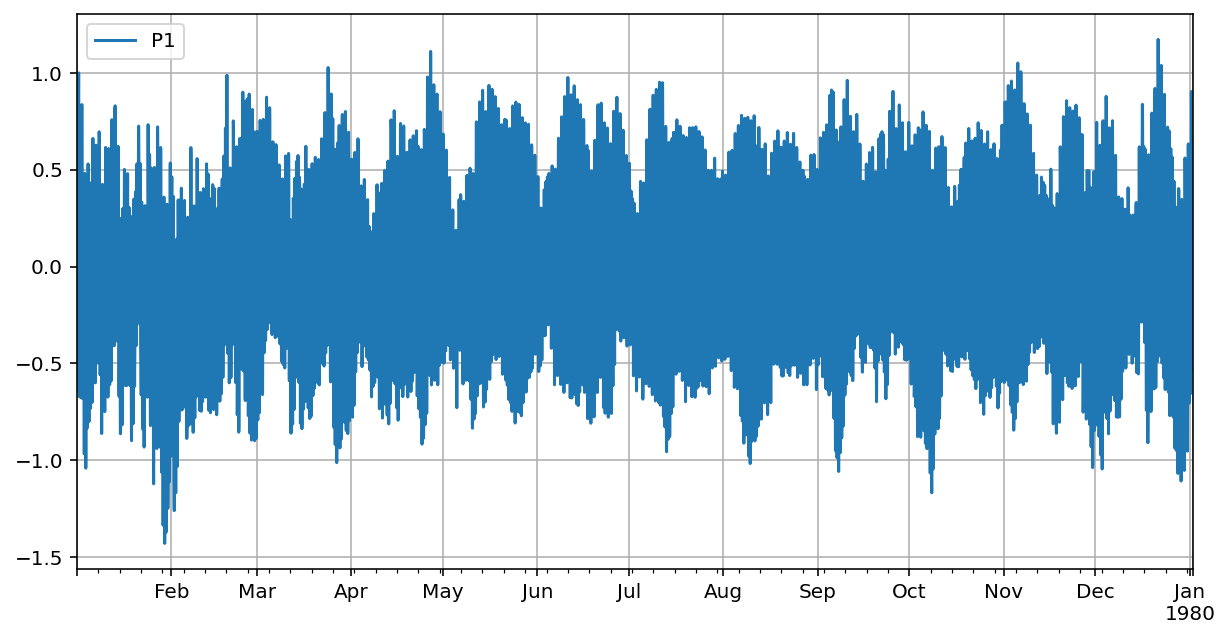

In [10]:
# Access DataFrame of data extracted for stations, outside of widgets
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(figsize=(10,5), dpi=144)

print(d.df_product_data.head())
d.df_product_data.plot(ax=ax1, label='post')
plt.legend()
ax1.grid(True)

<hr>
<font size="4">

The following example shows a plot of the prior and posterior at the 1point.csv location.  To do this, the above Extractor is run twice.  First, run with the data url as specified to get the posterior.  Then, save off the resulting dataframe as **df_post=d.df_product_data**.  Then, remove "-post" from the data url and resubmit.  Then save off the data frame as **df_prior=d.df_product_data**. 
</font>

In [9]:
# df_prior=d.df_product_data
# df_post=d.df_product_data

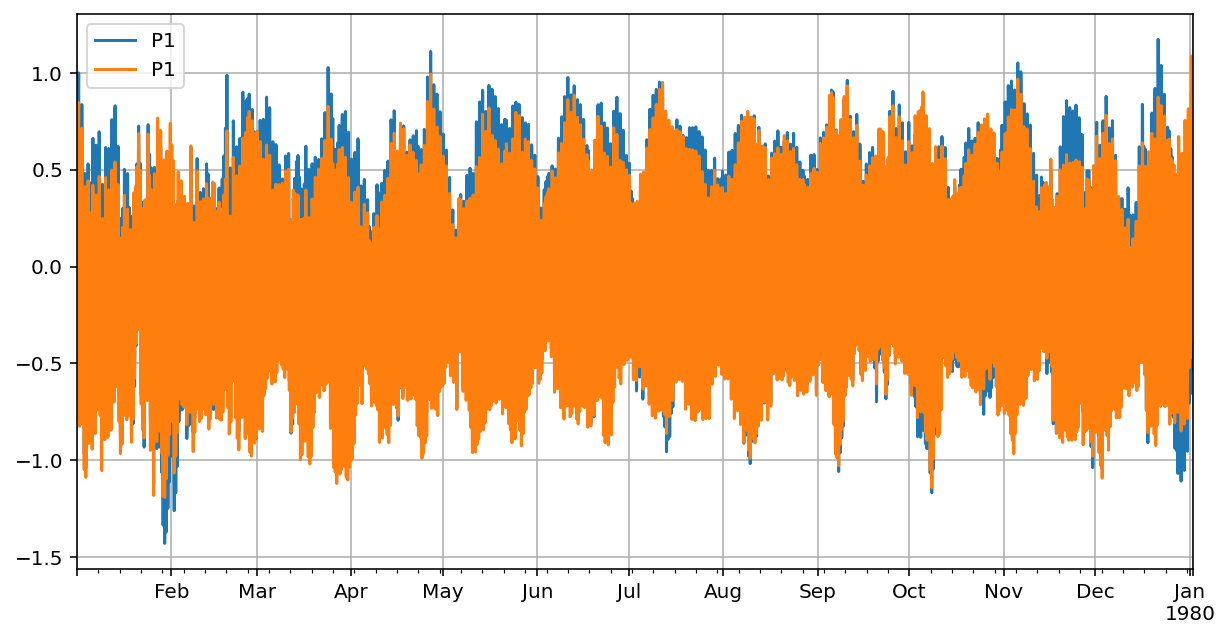

In [8]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(figsize=(10,5), dpi=144)

df_prior.plot(ax=ax1, label='prior')
df_post.plot(ax=ax1, label='post')
plt.legend()
ax1.grid(True)

### runtime estimates

| Np | Ny | time [sec] |
| -  | -  |     -      |
|1   |  1 |   20-30       |
|1   | 43 | 200        |


### Performing extractions "by hand"
The **examples** directory contains several examples of using the reanalysis utilities package directly, without the notebook interface.  

In [12]:
# TBA